In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open the benign philips hue captures from the IOT devices
phillips_hue = pd.read_pickle('Datasets/IOT23/Benign-Phillips-HUE/zeek_normal.pkl')

In [3]:
phillips_hue.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-10-25 12:06:37.400158882,192.168.1.132,1900,239.255.255.250,1900,udp,160.367579,S0,0,24,8208,0,0,benign,missing,0,1
1,2018-10-25 12:06:38.477547884,192.168.1.132,37653,104.155.18.91,443,tcp,78840.329305,OTH,0,3291,157263,2667,129675,benign,missing,1,3
2,2018-10-25 12:08:22.538640022,192.168.1.132,58687,216.239.35.4,123,udp,0.114184,SF,0,1,76,1,76,benign,missing,0,0
3,2018-10-25 12:09:45.734088898,192.168.1.132,32893,216.239.35.8,123,udp,0.016986,SF,0,1,76,1,76,benign,missing,0,0
4,2018-10-25 12:10:18.379528046,192.168.1.132,1900,239.255.255.250,1900,udp,384.518261,S0,0,48,16416,0,0,benign,missing,0,1


In [4]:
phillips_hue.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000,452.000000,452.000000,452.000000
mean,48306.522124,201.444690,347.392555,45.232301,29.610619,7.543912e+03,7.805310,581.851770,0.314159,0.042035
std,11877.479603,327.329725,4964.991365,440.060252,412.030448,1.309511e+05,125.368803,6097.843503,0.464694,0.241031
min,68.000000,53.000000,0.000479,0.000000,1.000000,6.200000e+01,0.000000,0.000000,0.000000,0.000000
25%,41905.000000,53.000000,0.007997,0.000000,1.000000,6.500000e+01,1.000000,76.000000,0.000000,0.000000
50%,52594.000000,80.000000,0.054824,0.000000,1.000000,7.600000e+01,1.000000,144.000000,0.000000,0.000000
75%,56663.250000,123.000000,0.114419,0.000000,4.000000,1.720000e+02,2.000000,325.000000,1.000000,0.000000
max,60977.000000,1900.000000,78840.329305,7363.000000,8124.000000,2.778408e+06,2667.000000,129675.000000,1.000000,3.000000


In [5]:
# drop non-informative features
phillips_hue.drop(columns=['label', 'detailed_label'], inplace=True)

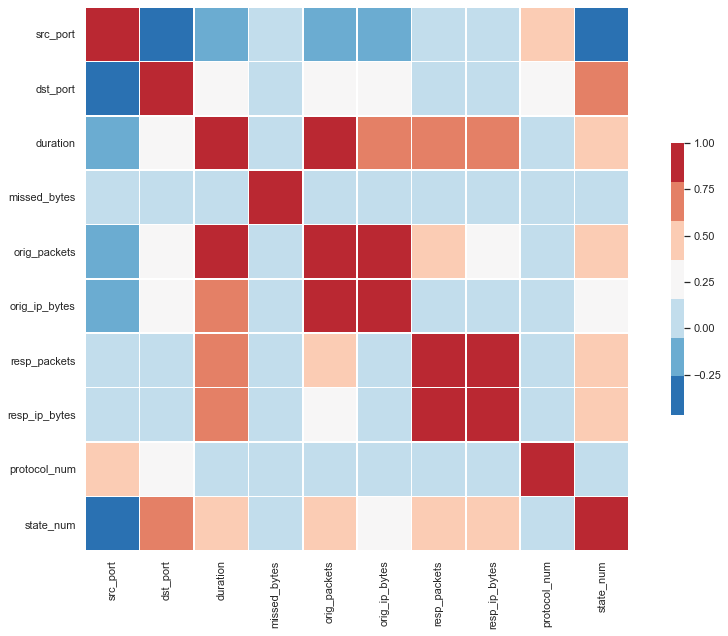

In [6]:
sns.set(style="white")
corr = phillips_hue.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Remove outliers

In [6]:
continuous = ['src_port', 'dst_port', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num', 'state_num']
phillips_hue_wo_outliers = phillips_hue[(np.abs(stats.zscore(phillips_hue[continuous])) < 3).all(axis=1)]
phillips_hue_wo_outliers.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.0
mean,49893.271889,151.089862,0.081285,47.108295,2.384793,359.988479,1.965438,304.682028,0.322581,0.0
std,8257.601284,148.900927,0.168417,449.015243,2.152789,826.016797,1.831519,392.110498,0.468003,0.0
min,32812.000000,53.000000,0.000479,0.000000,1.000000,62.000000,1.000000,69.000000,0.000000,0.0
25%,42768.000000,53.000000,0.005500,0.000000,1.000000,65.000000,1.000000,85.000000,0.000000,0.0
50%,53104.500000,80.000000,0.050840,0.000000,1.000000,76.000000,1.000000,144.000000,0.000000,0.0
75%,56670.750000,123.000000,0.113871,0.000000,4.000000,172.000000,2.000000,325.000000,1.000000,0.0
max,60977.000000,443.000000,3.000292,7363.000000,12.000000,10487.000000,12.000000,1831.000000,1.000000,0.0


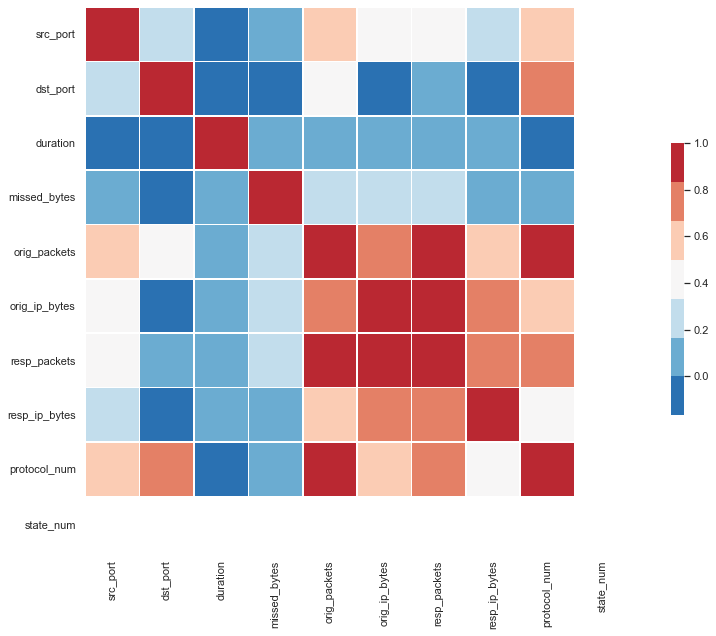

In [7]:
sns.set(style="white")
corr = phillips_hue_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Host level analysis

In [8]:
phillips_hue['src_ip'].nunique()

1

### Combine duration with the packets and bytes transferred and derive new features

In [9]:
# Since there is only one source IP in this dataset there is no need for further statistics analysis per host
phillips_hue['orig_packets_per_s'] = phillips_hue['orig_packets'] / phillips_hue['duration']
phillips_hue['resp_packets_per_s'] = phillips_hue['resp_packets'] / phillips_hue['duration']
phillips_hue['orig_bytes_per_s'] = phillips_hue['orig_ip_bytes'] / phillips_hue['duration']
phillips_hue['resp_bytes_per_s'] = phillips_hue['resp_ip_bytes'] / phillips_hue['duration']
phillips_hue['missed_bytes_per_s'] = phillips_hue['missed_bytes'] / phillips_hue['duration']
phillips_hue['packets_diff'] = phillips_hue['orig_packets'] - phillips_hue['resp_packets']
phillips_hue['bytes_diff'] = phillips_hue['orig_ip_bytes'] - phillips_hue['resp_ip_bytes']
phillips_hue['packets_per_s_diff'] = phillips_hue['orig_packets_per_s'] - phillips_hue['resp_packets_per_s']
phillips_hue['bytes_per_s_diff'] = phillips_hue['orig_bytes_per_s'] - phillips_hue['resp_bytes_per_s']
phillips_hue

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-10-25 12:06:37.400158882,192.168.1.132,1900,239.255.255.250,1900,udp,160.367579,S0,0,24,...,1,0.149656,0.000000,51.182415,0.000000,0.0,24,8208,0.149656,51.182415
1,2018-10-25 12:06:38.477547884,192.168.1.132,37653,104.155.18.91,443,tcp,78840.329305,OTH,0,3291,...,3,0.041743,0.033828,1.994702,1.644780,0.0,624,27588,0.007915,0.349922
2,2018-10-25 12:08:22.538640022,192.168.1.132,58687,216.239.35.4,123,udp,0.114184,SF,0,1,...,0,8.757794,8.757794,665.592377,665.592377,0.0,0,0,0.000000,0.000000
3,2018-10-25 12:09:45.734088898,192.168.1.132,32893,216.239.35.8,123,udp,0.016986,SF,0,1,...,0,58.872012,58.872012,4474.272931,4474.272931,0.0,0,0,0.000000,0.000000
4,2018-10-25 12:10:18.379528046,192.168.1.132,1900,239.255.255.250,1900,udp,384.518261,S0,0,48,...,1,0.124832,0.000000,42.692381,0.000000,0.0,48,16416,0.124832,42.692381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2018-10-26 09:37:31.702119112,192.168.1.132,55520,216.239.35.0,123,udp,0.109427,SF,0,1,...,0,9.138512,9.138512,694.526945,694.526945,0.0,0,0,0.000000,0.000000
448,2018-10-26 09:42:40.912616968,192.168.1.132,35983,216.239.35.4,123,udp,0.116680,SF,0,1,...,0,8.570449,8.570449,651.354131,651.354131,0.0,0,0,0.000000,0.000000
449,2018-10-26 09:47:22.580300093,192.168.1.132,43799,192.168.1.1,53,udp,0.066709,SF,0,1,...,0,14.990481,14.990481,929.409825,4871.906339,0.0,0,-263,0.000000,-3942.496515
450,2018-10-26 09:47:22.647506952,192.168.1.132,53722,2.16.60.82,443,tcp,0.011493,SF,0,4,...,0,348.037936,174.018968,14965.631254,8004.872531,0.0,2,80,174.018968,6960.758723


In [10]:
phillips_hue.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000,452.000000
mean,48306.522124,201.444690,347.392555,45.232301,29.610619,7.543912e+03,7.805310,581.851770,0.314159,0.042035,410.211908,347.103678,26720.296307,44871.919564,355.278608,21.805310,6.962060e+03,63.108231,-18151.623257
std,11877.479603,327.329725,4964.991365,440.060252,412.030448,1.309511e+05,125.368803,6097.843503,0.464694,0.241031,665.951420,624.250466,45658.068511,89107.890358,3128.781743,383.419799,1.307788e+05,155.601012,52499.338276
min,68.000000,53.000000,0.000479,0.000000,1.000000,6.200000e+01,0.000000,0.000000,0.000000,0.000000,0.041743,0.000000,1.994702,0.000000,0.000000,-4.000000,-4.260000e+02,-25.696702,-254000.000000
25%,41905.000000,53.000000,0.007997,0.000000,1.000000,6.500000e+01,1.000000,76.000000,0.000000,0.000000,8.974324,8.974324,665.589463,1621.871260,0.000000,0.000000,-1.420000e+02,0.000000,-4678.237752
50%,52594.000000,80.000000,0.054824,0.000000,1.000000,7.600000e+01,1.000000,144.000000,0.000000,0.000000,52.894219,52.894219,4475.722156,6757.436434,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,56663.250000,123.000000,0.114419,0.000000,4.000000,1.720000e+02,2.000000,325.000000,1.000000,0.000000,428.109309,261.028452,22910.067640,26308.264226,0.000000,0.250000,6.800000e+01,0.001979,5439.666332
max,60977.000000,1900.000000,78840.329305,7363.000000,8124.000000,2.778408e+06,2667.000000,129675.000000,1.000000,3.000000,2087.682672,2087.682672,330312.185297,402000.000000,47301.203890,8124.000000,2.778408e+06,616.142945,40593.396234


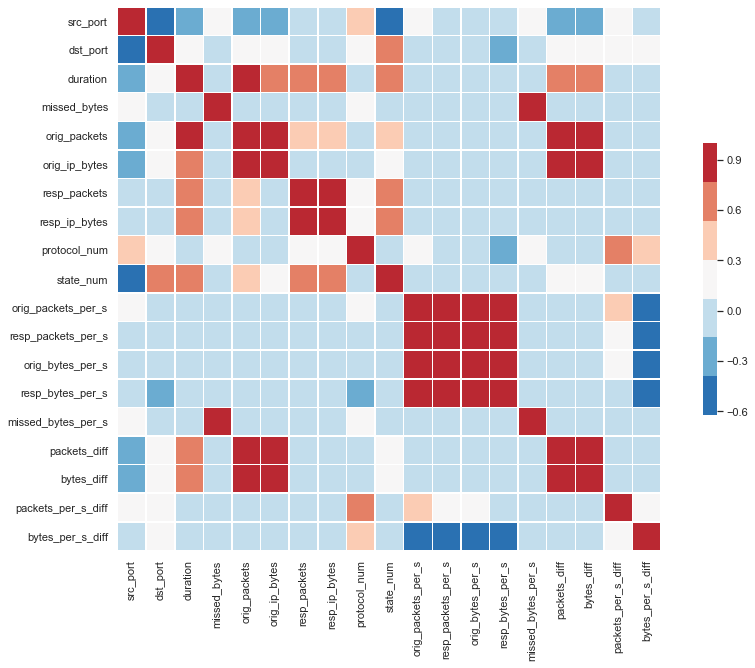

In [11]:
sns.set(style="white")
corr = phillips_hue.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Iniatial removing of outliers in the interesting continuous features

In [12]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
phillips_hue_wo_outliers = phillips_hue[(np.abs(stats.zscore(phillips_hue[continuous])) < 3).all(axis=1)]
phillips_hue_wo_outliers.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,49581.480418,131.566580,0.091795,53.381201,2.279373,388.691906,1.971279,327.355091,0.281984,0.0,271.814182,245.626190,18616.690844,32081.644559,419.284414,0.308094,61.336815,26.187992,-13464.953715
std,8396.891919,130.891927,0.176659,477.698755,2.182215,875.129058,1.927131,412.012211,0.450554,0.0,550.511331,541.938744,35375.109770,68017.979728,3395.671976,0.818063,668.776420,67.890222,38483.353797
min,32812.000000,53.000000,0.000479,0.000000,1.000000,62.000000,1.000000,69.000000,0.000000,0.0,1.999805,0.666602,91.991046,30.663682,0.000000,-4.000000,-426.000000,-25.696702,-126835.781041
25%,42305.500000,53.000000,0.011494,0.000000,1.000000,65.000000,1.000000,76.000000,0.000000,0.0,8.964480,8.964480,665.563233,1613.802753,0.000000,0.000000,-263.000000,0.000000,-4647.976218
50%,52156.000000,80.000000,0.061951,0.000000,1.000000,76.000000,1.000000,152.000000,0.000000,0.0,28.587764,27.613630,1772.441395,5780.963731,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56694.500000,123.000000,0.114425,0.000000,4.000000,172.000000,2.000000,325.000000,1.000000,0.0,250.000000,174.011398,18352.728153,12529.365701,0.000000,0.000000,54.000000,0.000000,3479.168505
max,60977.000000,443.000000,3.000292,7363.000000,12.000000,10487.000000,12.000000,1831.000000,1.000000,0.0,2087.682672,2087.682672,144050.104384,257028.112450,47301.203890,6.000000,9818.000000,471.142521,40593.396234


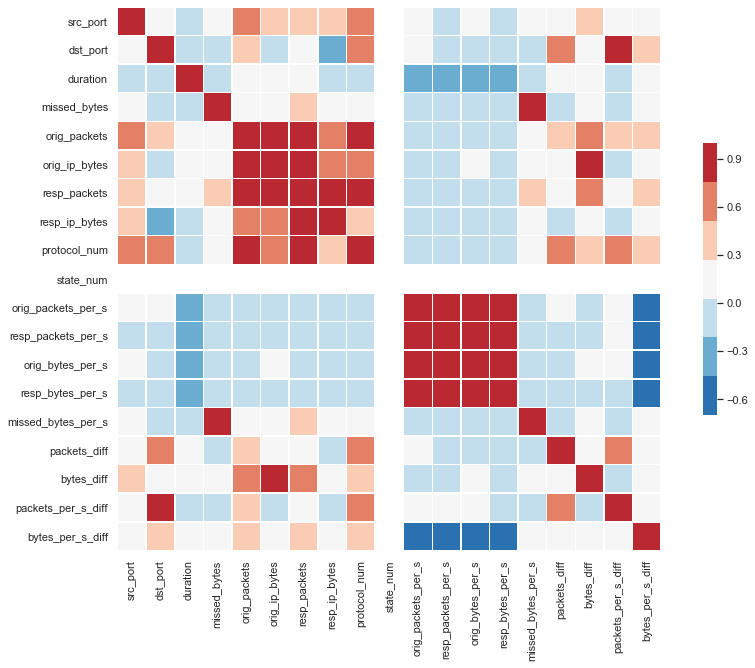

In [13]:
sns.set(style="white")
corr = phillips_hue_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Duration against time

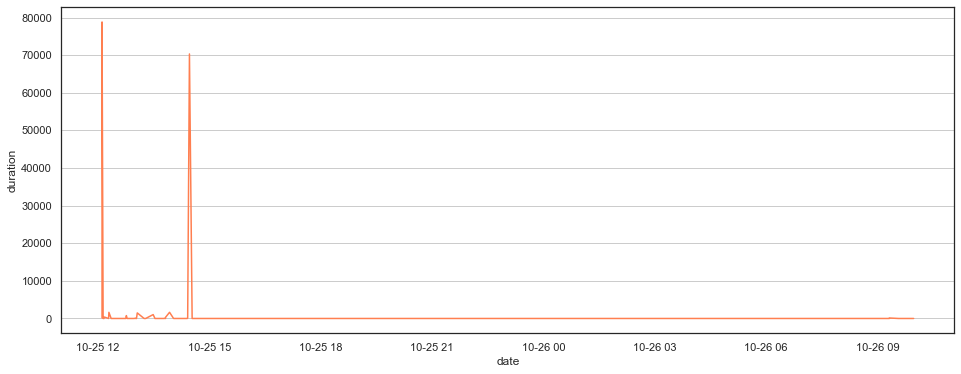

In [14]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue, color="coral")
plt.grid(axis='y')

#### Without outliers

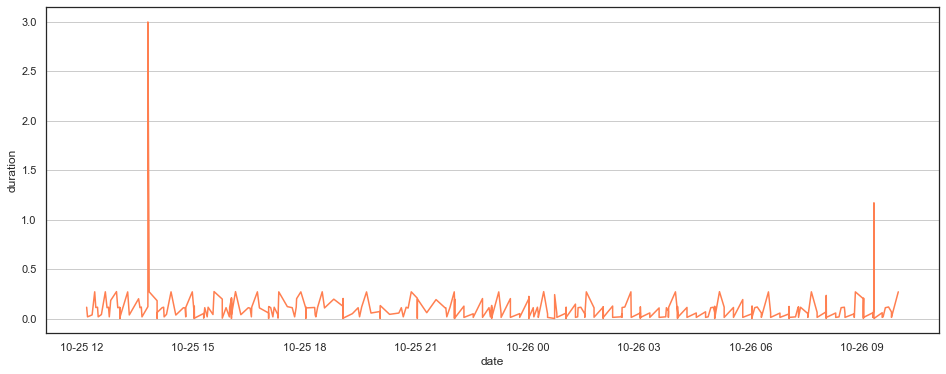

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue_wo_outliers, color="coral")
plt.grid(axis='y')

### Number of bytes against time

Text(0, 0.5, 'Number of bytes')

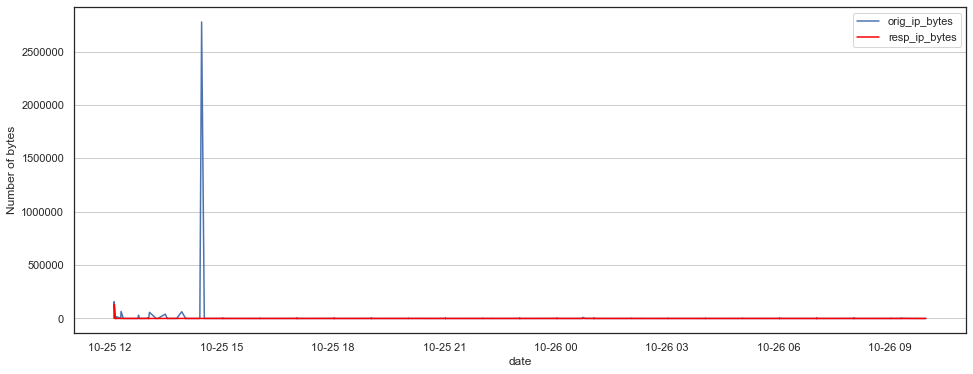

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Without outliers

Text(0, 0.5, 'Number of bytes')

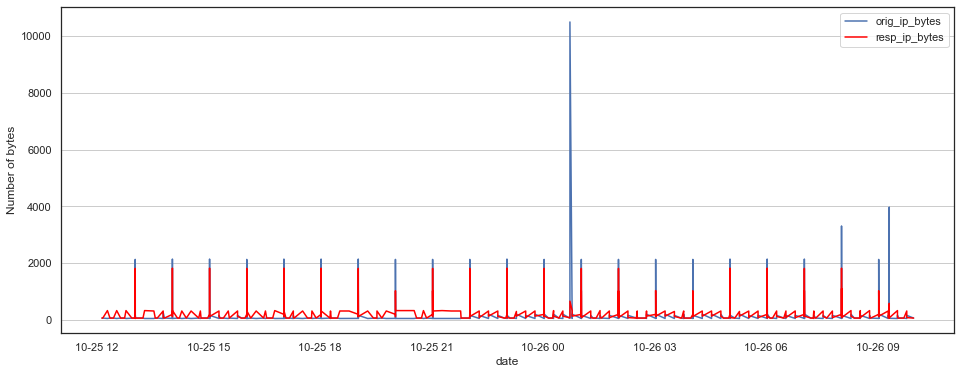

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue_wo_outliers, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue_wo_outliers, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time

Text(0, 0.5, 'Number of packets')

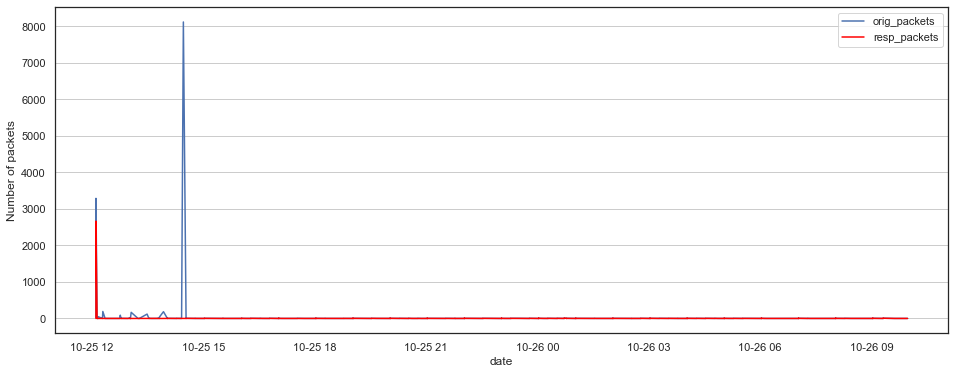

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Without outliers

Text(0, 0.5, 'Number of packets')

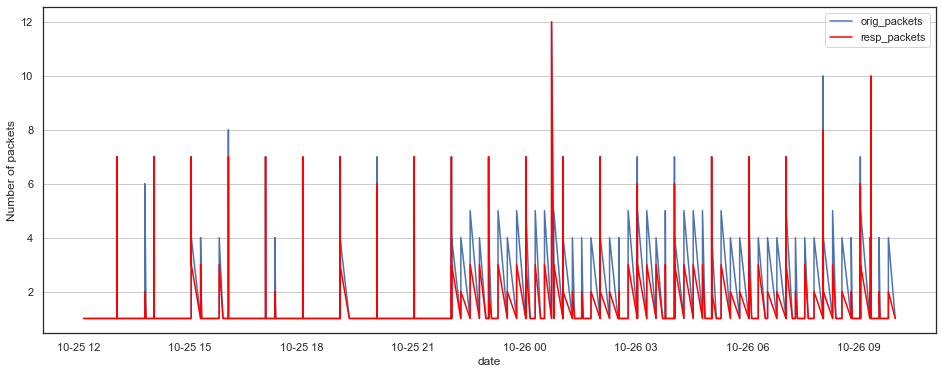

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue_wo_outliers, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue_wo_outliers, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's vs Responder's bytes/sec and packets/sec

Text(0, 0.5, 'Bytes / sec')

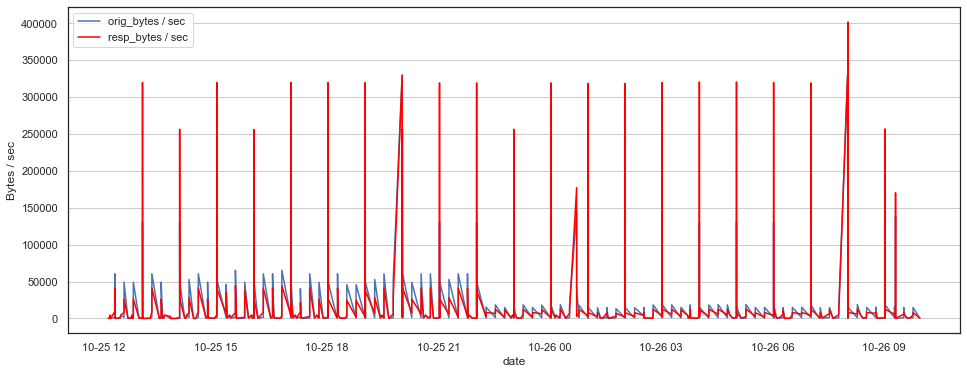

In [20]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue, label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

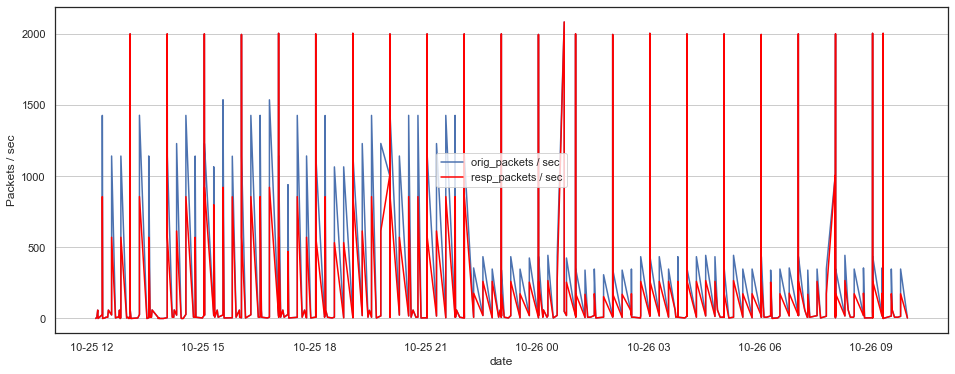

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue, label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### Without outliers

Text(0, 0.5, 'Bytes / sec')

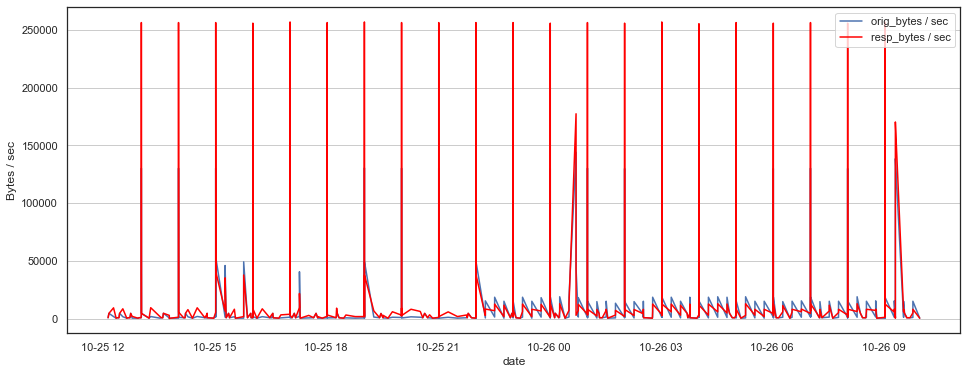

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue_wo_outliers, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue_wo_outliers, label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

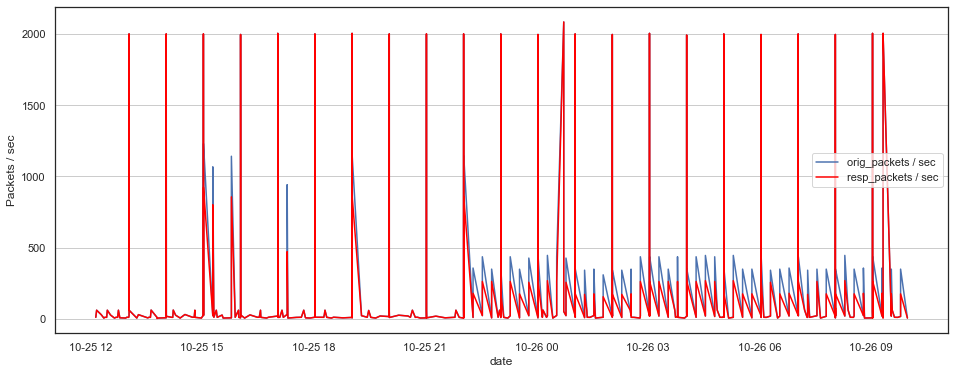

In [23]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue_wo_outliers, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue_wo_outliers, label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Packets / sec")

### Difference between sent and received bytes

Text(0, 0.5, "Difference between originator's and responder's bytes")

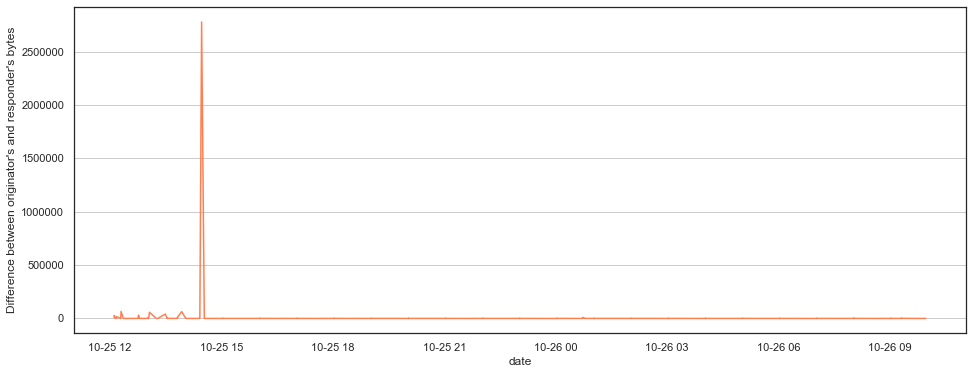

In [24]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's bytes")

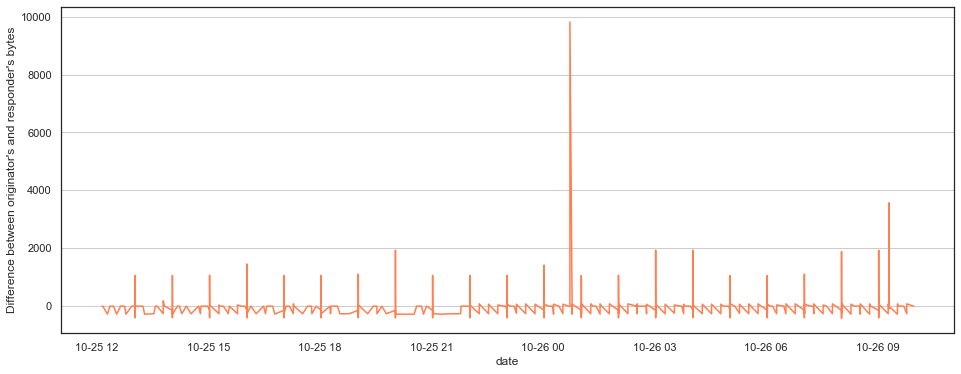

In [25]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue_wo_outliers, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between sent and received packets

Text(0, 0.5, "Difference between originator's and responder's packets")

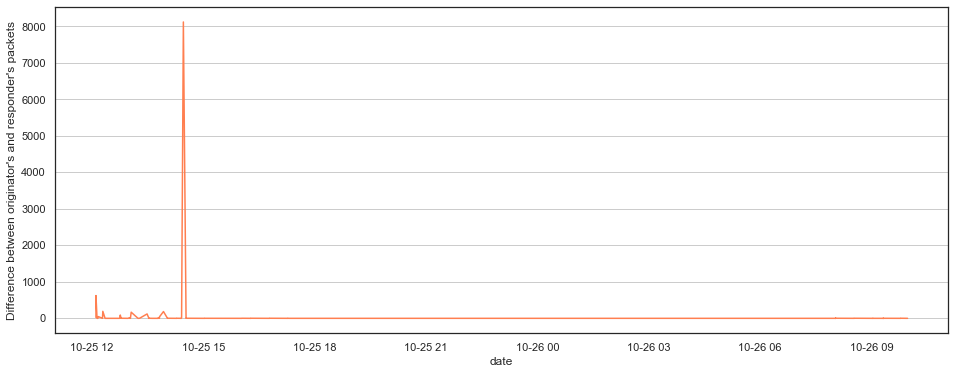

In [26]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's packets")

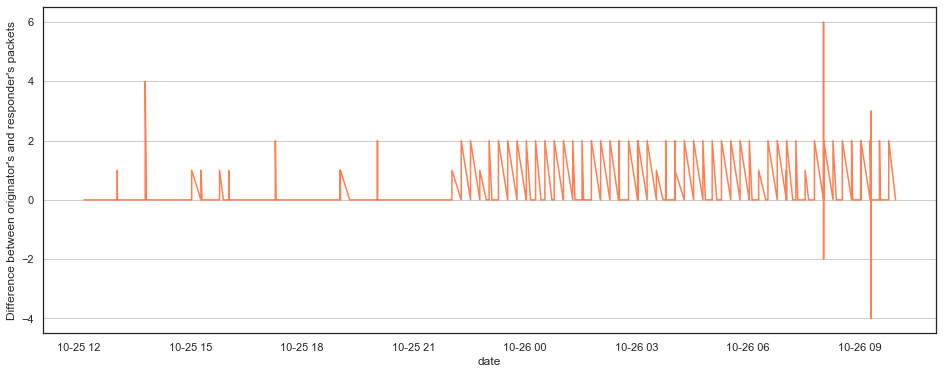

In [27]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue_wo_outliers, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Difference between byte rates

Text(0, 0.5, "Difference between originator's and responder's bytes/s")

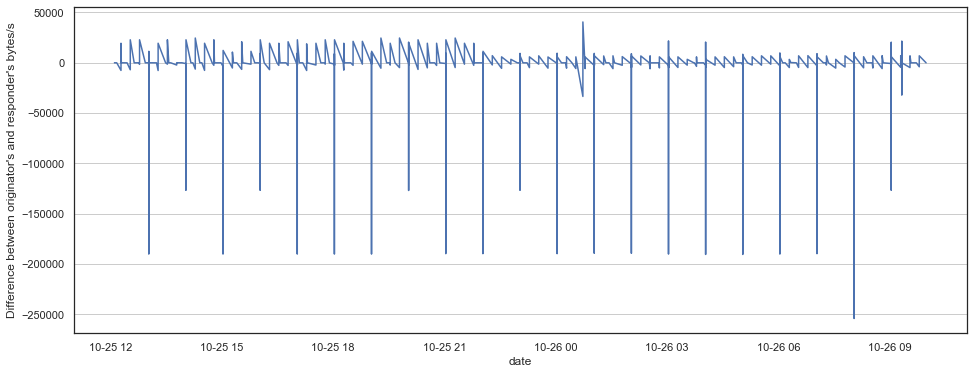

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/s")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's bytes/s")

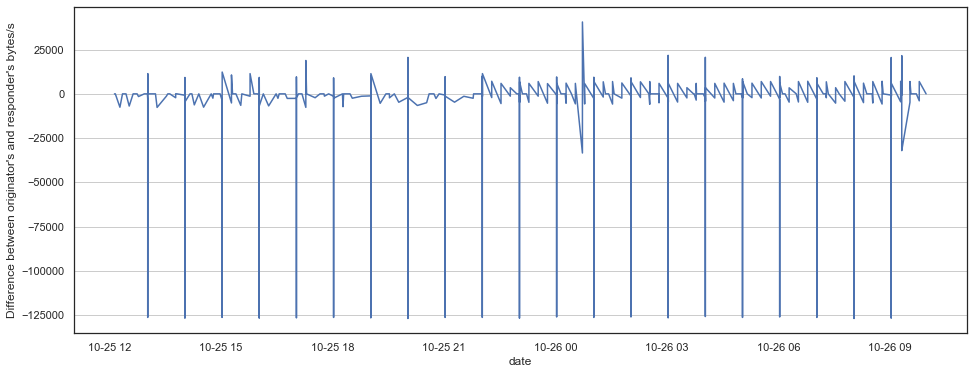

In [29]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/s")

### Difference between packet rates

Text(0, 0.5, "Difference between originator's and responder's packets/s")

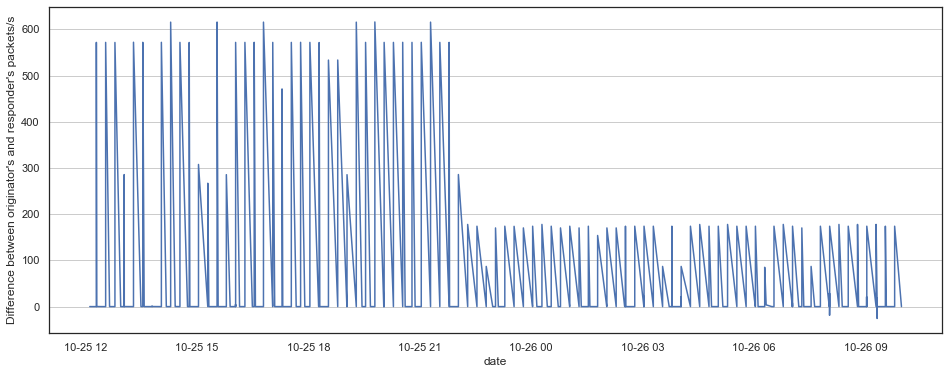

In [30]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=phillips_hue)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/s")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's packets/s")

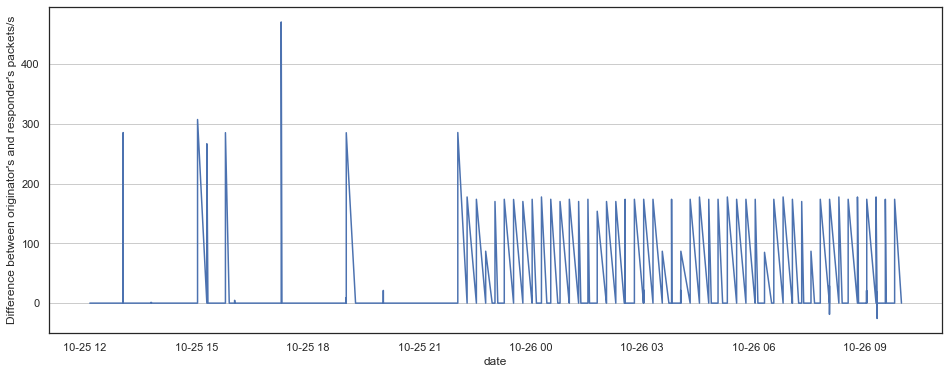

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=phillips_hue_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/s")

### Protocol type distribution

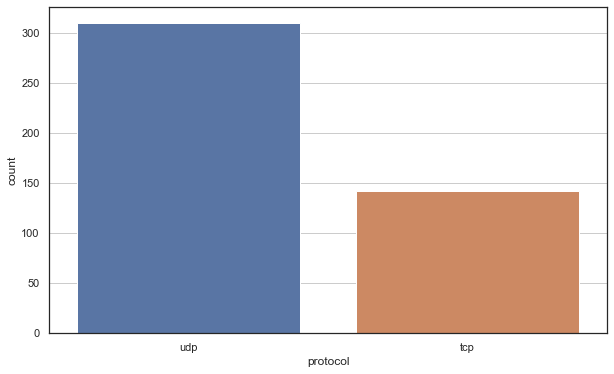

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

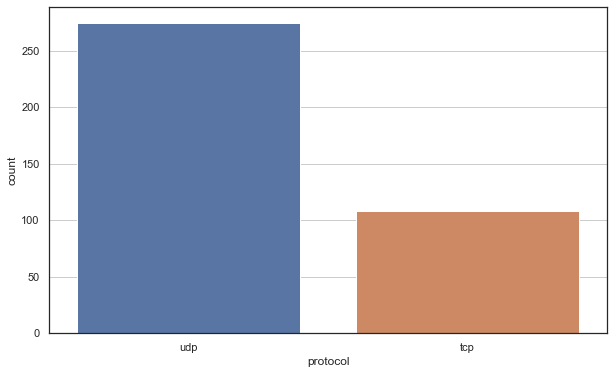

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

### Packets sent per protocol

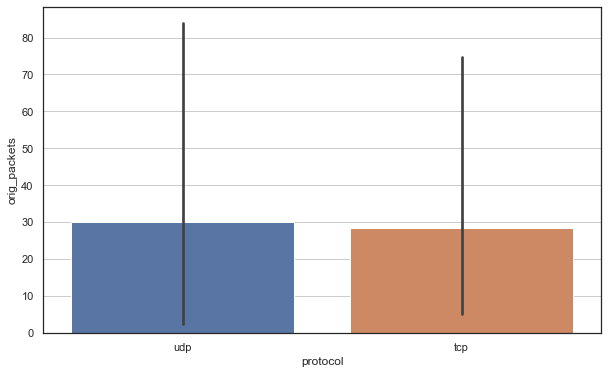

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

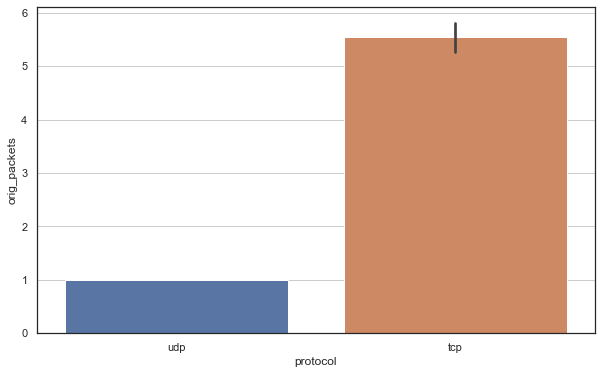

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

### Packets received per protocol

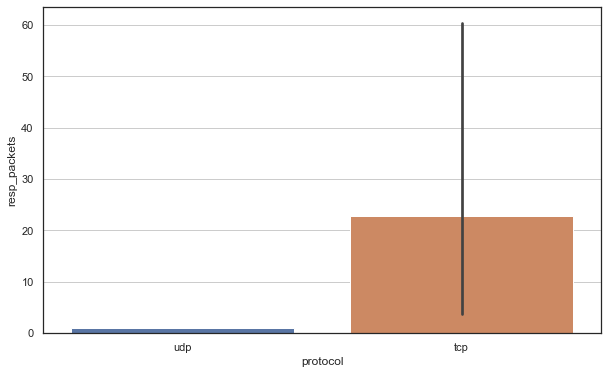

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

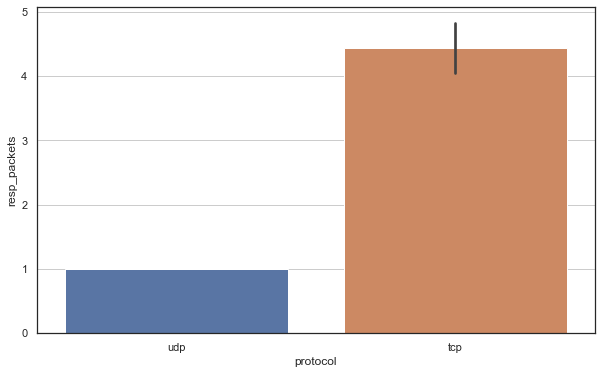

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

### Bytes sent per protocol

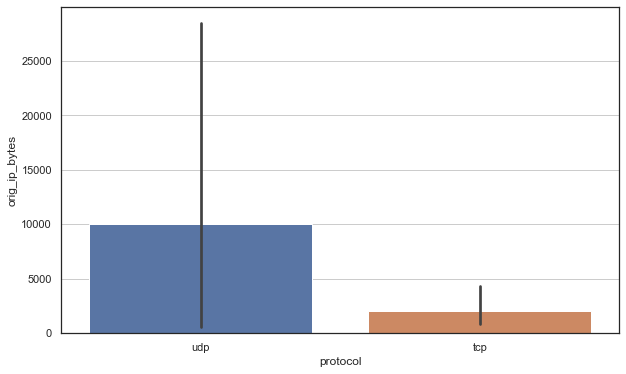

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

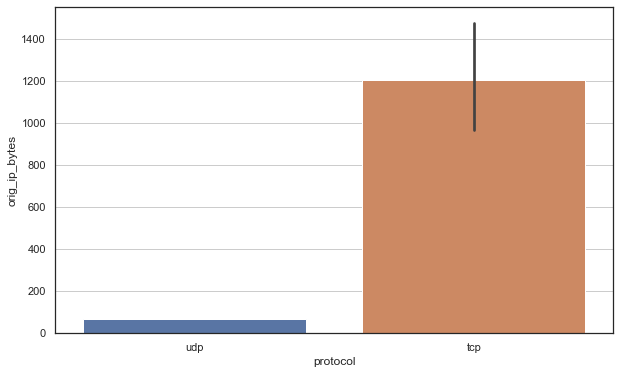

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

### Bytes received per protocol

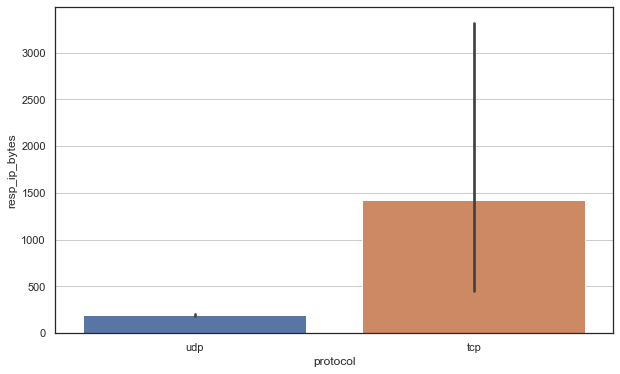

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

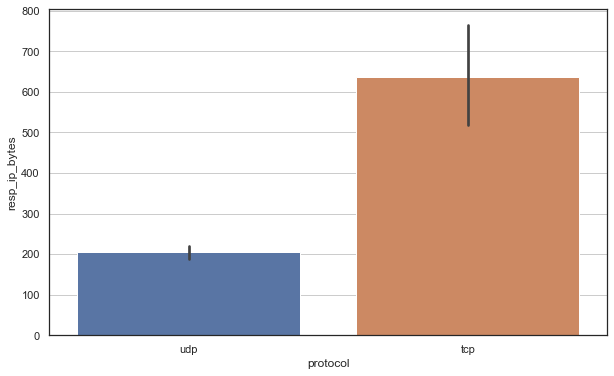

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

### Duration per protocol

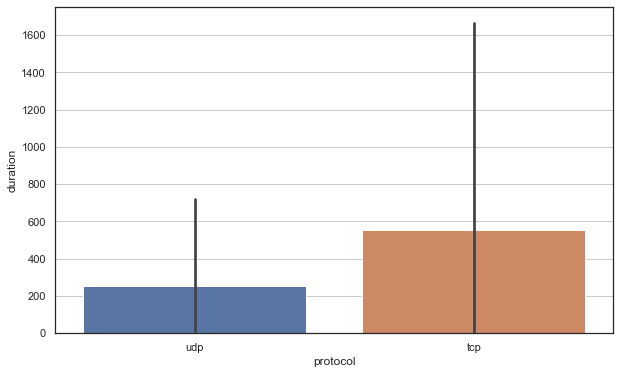

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=phillips_hue)
plt.grid(axis='y')

#### Without outliers

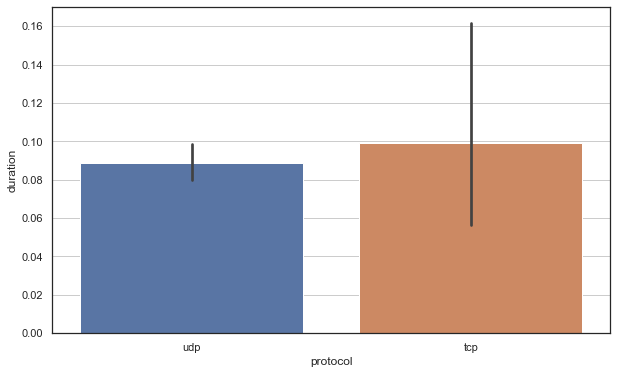

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=phillips_hue_wo_outliers)
plt.grid(axis='y')

## Connection level analysis

In [46]:
phillips_grouped_connection_pb = phillips_hue.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
phillips_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
phillips_grouped_connection_pb = phillips_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
phillips_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.1.132,192.168.1.1,193,1.000000,1.0,1,1,0.000000,66.901554,65.0,...,1.000000,1.0,1,1,0.000000,271.782383,325,500,69,110.458016
1,192.168.1.132,2.16.60.82,47,4.425532,4.0,6,4,0.541523,189.531915,172.0,...,2.510638,3.0,3,2,0.505291,117.021277,132,144,92,25.042129
2,192.168.1.132,2.16.60.139,39,4.410256,4.0,5,4,0.498310,188.410256,172.0,...,2.538462,3.0,3,2,0.505035,118.461538,132,144,92,25.108026
3,192.168.1.132,216.239.35.12,27,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,0.962963,1.0,1,0,0.192450,73.185185,76,76,0,14.626207
4,192.168.1.132,216.239.35.4,26,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
5,192.168.1.132,216.239.35.8,26,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
6,192.168.1.132,216.239.35.0,25,1.000000,1.0,1,1,0.000000,76.000000,76.0,...,1.000000,1.0,1,1,0.000000,76.000000,76,76,76,0.000000
7,192.168.1.132,52.215.95.120,22,6.454545,6.0,7,6,0.509647,2086.727273,2099.0,...,6.181818,6.0,8,5,0.732664,1107.681818,1043,1831,204,493.046157
8,192.168.1.132,52.209.221.67,21,6.619048,7.0,7,6,0.497613,2126.571429,2139.0,...,6.523810,7.0,7,5,0.601585,1448.761905,1823,1831,204,480.117892
9,192.168.1.132,239.255.255.250,13,696.000000,48.0,8124,12,2232.889608,238032.000000,16416.0,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000


### Now let's keep the IP pair with at least 100 flows

In [47]:
phillips_hue_conn = phillips_hue.loc[(phillips_hue['src_ip'] == '192.168.1.132') & (phillips_hue['dst_ip'] == '192.168.1.1')].reset_index(drop=True)
phillips_hue_conn['orig_packets_per_s'] = phillips_hue_conn['orig_packets'] / phillips_hue_conn['duration']
phillips_hue_conn['resp_packets_per_s'] = phillips_hue_conn['resp_packets'] / phillips_hue_conn['duration']
phillips_hue_conn['orig_bytes_per_s'] = phillips_hue_conn['orig_ip_bytes'] / phillips_hue_conn['duration']
phillips_hue_conn['resp_bytes_per_s'] = phillips_hue_conn['resp_ip_bytes'] / phillips_hue_conn['duration']
phillips_hue_conn['packets_diff'] = phillips_hue_conn['orig_packets'] - phillips_hue_conn['resp_packets']
phillips_hue_conn['bytes_diff'] = phillips_hue_conn['orig_ip_bytes'] - phillips_hue_conn['resp_ip_bytes']
phillips_hue_conn['packets_per_s_diff'] = phillips_hue_conn['orig_packets_per_s'] - phillips_hue_conn['resp_packets_per_s']
phillips_hue_conn['bytes_per_s_diff'] = phillips_hue_conn['orig_bytes_per_s'] - phillips_hue_conn['resp_bytes_per_s']
phillips_hue_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-10-25 12:17:11.265404939,192.168.1.132,52801,192.168.1.1,53,udp,0.036724,SF,0,1,...,0,27.230149,27.230149,1688.269252,9231.020586,0.0,0,-277,0.0,-7542.751334
1,2018-10-25 12:32:11.305747032,192.168.1.132,48230,192.168.1.1,53,udp,0.040227,SF,0,1,...,0,24.858926,24.858926,1541.253387,8427.175777,0.0,0,-277,0.0,-6885.922390
2,2018-10-25 12:47:11.350065947,192.168.1.132,34110,192.168.1.1,53,udp,0.183145,SF,0,1,...,0,5.460155,5.460155,338.529580,1850.992383,0.0,0,-277,0.0,-1512.462803
3,2018-10-25 13:02:04.797194958,192.168.1.132,40730,192.168.1.1,53,udp,0.050455,SF,0,1,...,0,19.819641,19.819641,1288.276682,4102.665742,0.0,0,-142,0.0,-2814.389060
4,2018-10-25 13:02:04.848149061,192.168.1.132,50152,192.168.1.1,53,udp,0.003998,SF,0,1,...,0,250.125063,250.125063,16258.129065,117558.779390,0.0,0,-405,0.0,-101300.650325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2018-10-26 09:19:07.360032082,192.168.1.132,44238,192.168.1.1,53,udp,0.000499,SF,0,1,...,0,2004.008016,2004.008016,138276.553106,170340.681363,0.0,0,-16,0.0,-32064.128257
189,2018-10-26 09:19:07.511194944,192.168.1.132,35692,192.168.1.1,53,udp,0.000500,SF,0,1,...,0,2000.000000,2000.000000,138000.000000,138000.000000,0.0,0,0,0.0,0.000000
190,2018-10-26 09:19:07.512195109,192.168.1.132,55713,192.168.1.1,53,udp,0.000500,SF,0,1,...,0,2000.000000,2000.000000,138000.000000,170000.000000,0.0,0,-16,0.0,-32000.000000
191,2018-10-26 09:32:22.514566898,192.168.1.132,38092,192.168.1.1,53,udp,0.058485,SF,0,1,...,0,17.098401,17.098401,1060.100881,5796.358041,0.0,0,-277,0.0,-4736.257160


In [48]:
phillips_hue_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,193.000000,193.000000,193.000000,193.0,193.0,193.000000,193.0,193.000000,193.0,193.0,193.000000,193.000000,193.000000,193.000000,193.0,193.0,193.000000,193.0,193.000000
mean,46706.901554,53.145078,0.058205,0.0,1.0,66.901554,1.0,271.782383,0.0,0.0,585.388530,585.388530,41419.179891,91729.914219,0.0,0.0,-204.880829,0.0,-50310.734328
std,9259.023633,1.421446,0.064220,0.0,0.0,26.916260,0.0,110.458016,0.0,0.0,853.398287,853.398287,63781.780078,120860.953826,0.0,0.0,113.421142,0.0,67675.818066
min,68.000000,53.000000,0.000479,0.0,1.0,62.000000,1.0,69.000000,0.0,0.0,4.432113,4.432113,299.692091,770.095958,0.0,0.0,-426.000000,0.0,-254000.000000
25%,39877.000000,53.000000,0.000749,0.0,1.0,62.000000,1.0,160.000000,0.0,0.0,9.351300,9.351300,586.621251,3032.084115,0.0,0.0,-263.000000,0.0,-107971.207678
50%,47242.000000,53.000000,0.047465,0.0,1.0,65.000000,1.0,325.000000,0.0,0.0,21.068155,21.068155,1327.026391,6956.186725,0.0,0.0,-263.000000,0.0,-5291.218187
75%,53836.000000,53.000000,0.106937,0.0,1.0,65.000000,1.0,325.000000,0.0,0.0,1335.113485,1335.113485,129482.071713,213049.267643,0.0,0.0,-95.000000,0.0,-2304.383927
max,60977.000000,67.000000,0.225626,0.0,1.0,328.000000,1.0,500.000000,0.0,0.0,2087.682672,2087.682672,330312.185297,402000.000000,0.0,0.0,0.000000,0.0,0.000000


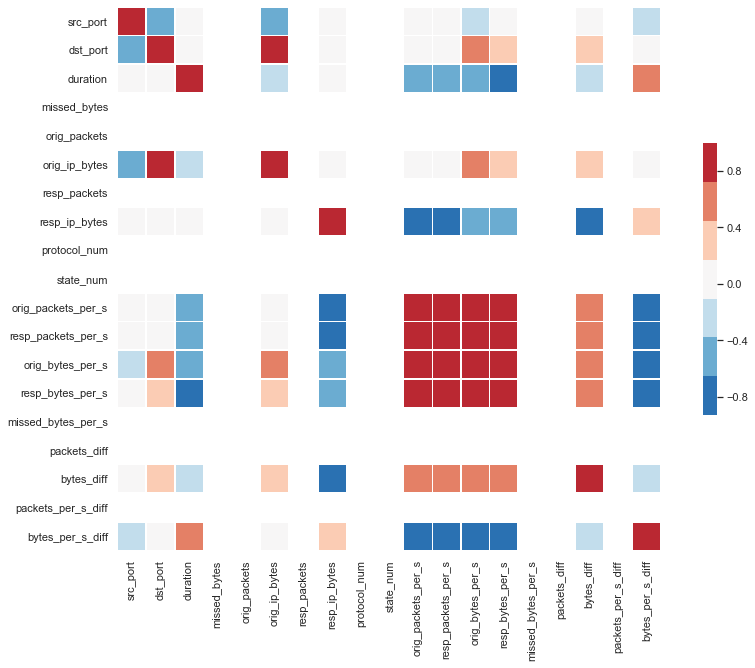

In [14]:
sns.set(style="white")
corr = phillips_hue_conn.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Remove outliers

In [50]:
continuous = ['duration', 'orig_ip_bytes', 'resp_ip_bytes', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'bytes_diff', 'bytes_per_s_diff']
phillips_hue_conn_wo_outliers = phillips_hue_conn[(np.abs(stats.zscore(phillips_hue_conn[continuous])) < 3).all(axis=1)]
phillips_hue_conn_wo_outliers.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,missed_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,189.000000,189.0,189.000000,189.0,189.0,189.000000,189.0,189.000000,189.0,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.0,189.000000,189.0,189.000000
mean,47221.449735,53.0,0.059421,0.0,1.0,64.063492,1.0,271.936508,0.0,0.0,565.983559,565.983559,37237.592929,85927.956481,0.0,0.0,-207.873016,0.0,-48690.363552
std,7979.010908,0.0,0.064344,0.0,0.0,2.455171,0.0,111.236791,0.0,0.0,848.699050,848.699050,55944.067485,115144.000829,0.0,0.0,112.329799,0.0,64866.155365
min,32812.000000,53.0,0.000479,0.0,1.0,62.000000,1.0,69.000000,0.0,0.0,4.432113,4.432113,299.692091,770.095958,0.0,0.0,-426.000000,0.0,-190380.761523
25%,40614.000000,53.0,0.000749,0.0,1.0,62.000000,1.0,160.000000,0.0,0.0,9.329490,9.329490,585.253500,3025.141251,0.0,0.0,-263.000000,0.0,-107942.430704
50%,47284.000000,53.0,0.047968,0.0,1.0,65.000000,1.0,325.000000,0.0,0.0,20.847231,20.847231,1292.528352,6739.522634,0.0,0.0,-263.000000,0.0,-5291.218187
75%,53880.000000,53.0,0.107187,0.0,1.0,65.000000,1.0,325.000000,0.0,0.0,1335.113485,1335.113485,86782.376502,170340.681363,0.0,0.0,-95.000000,0.0,-2336.846064
max,60977.000000,53.0,0.225626,0.0,1.0,74.000000,1.0,500.000000,0.0,0.0,2087.682672,2087.682672,148296.593186,338677.354709,0.0,0.0,0.000000,0.0,0.000000


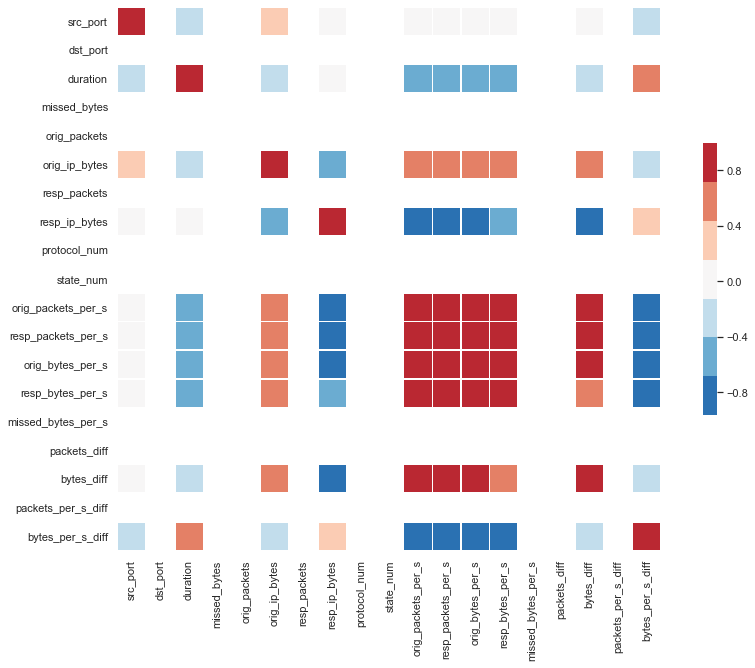

In [51]:
sns.set(style="white")
corr = phillips_hue_conn_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Duration against time

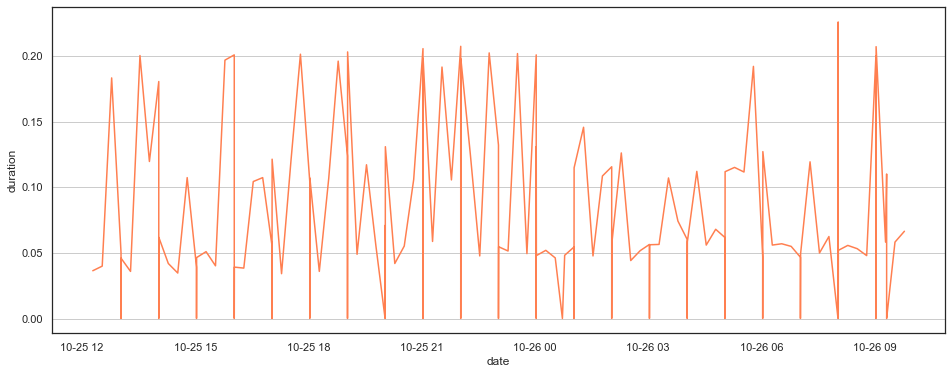

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')

#### Without outliers

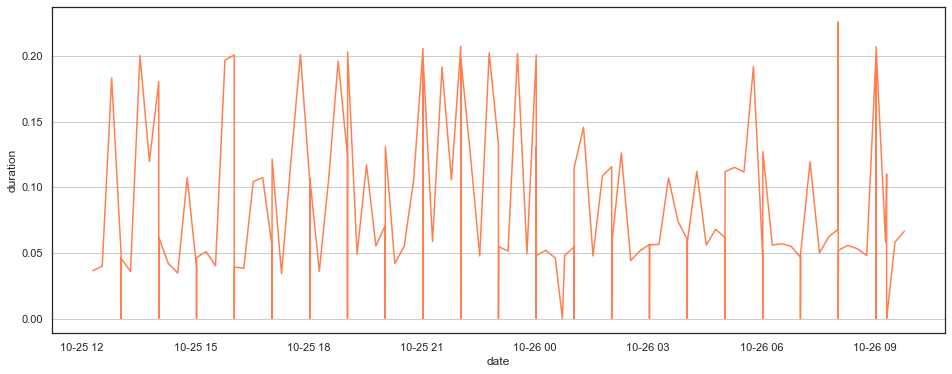

In [53]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=phillips_hue_conn_wo_outliers, color="coral")
plt.grid(axis='y')

### Number of bytes against time

Text(0, 0.5, 'Number of bytes')

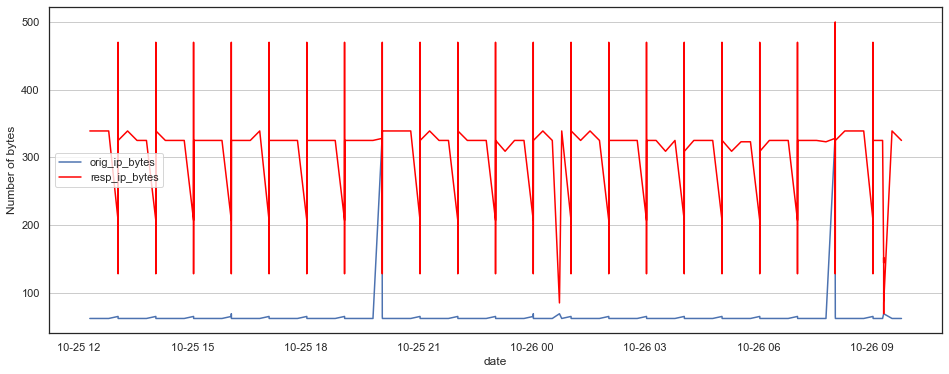

In [54]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue_conn, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Without outliers

Text(0, 0.5, 'Number of bytes')

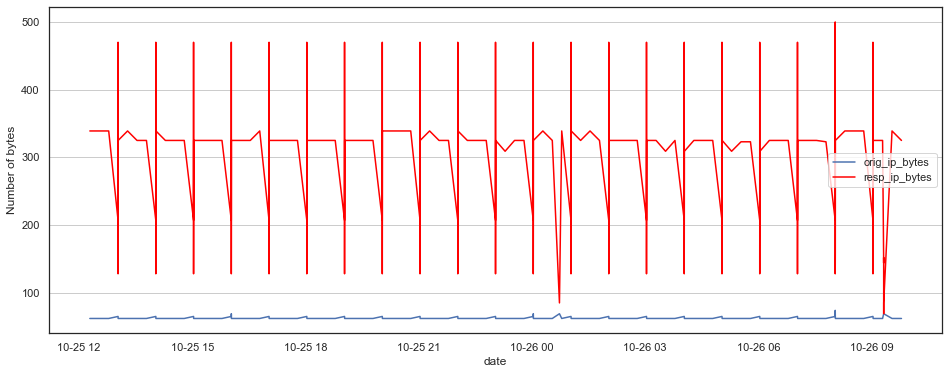

In [55]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=phillips_hue_conn_wo_outliers, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=phillips_hue_conn_wo_outliers, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time

Text(0, 0.5, 'Number of packets')

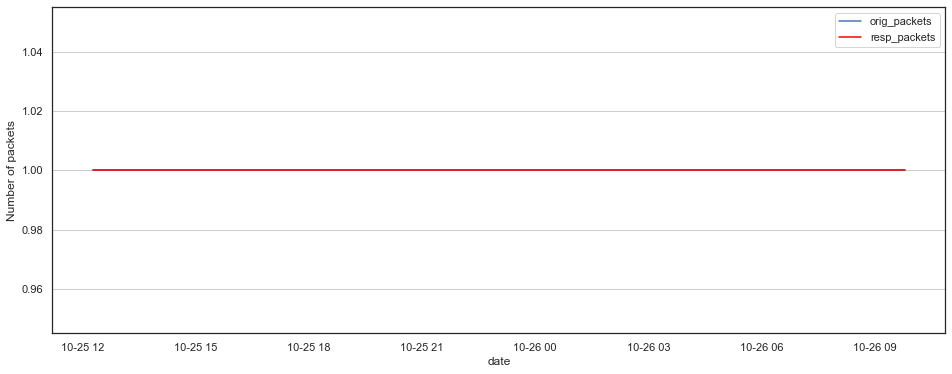

In [56]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue_conn, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue_conn, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Without outliers

Text(0, 0.5, 'Number of packets')

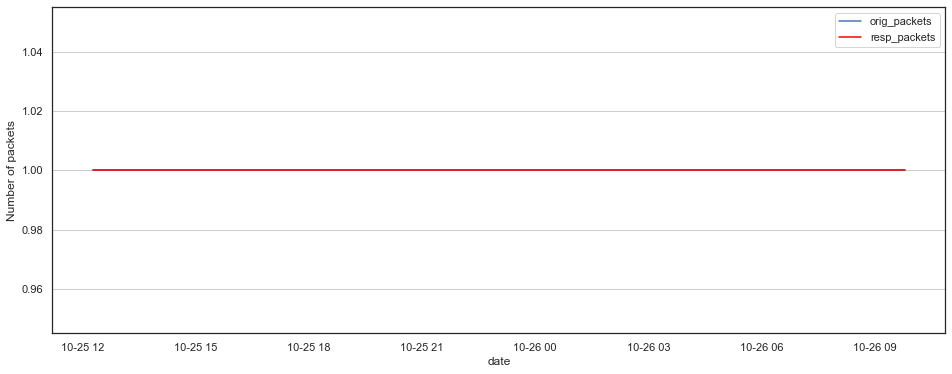

In [57]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=phillips_hue_conn_wo_outliers, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=phillips_hue_conn_wo_outliers, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's vs Responder's bytes/sec

Text(0, 0.5, 'Bytes / sec')

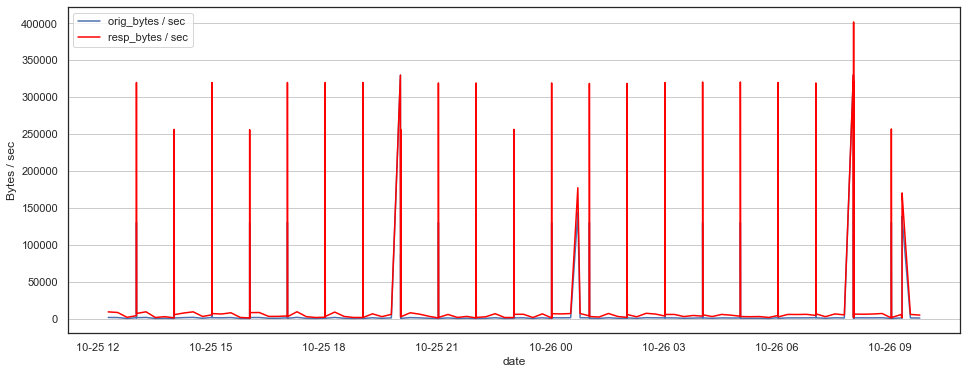

In [58]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue_conn, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue_conn, label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

#### Without outliers

Text(0, 0.5, 'Bytes / sec')

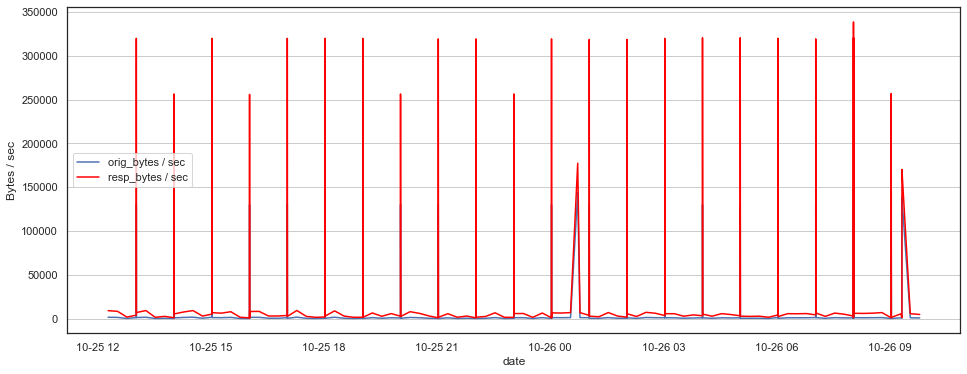

In [59]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=phillips_hue_conn_wo_outliers, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=phillips_hue_conn_wo_outliers, label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

### Originator's vs Responder's packets/sec

Text(0, 0.5, 'Packets / sec')

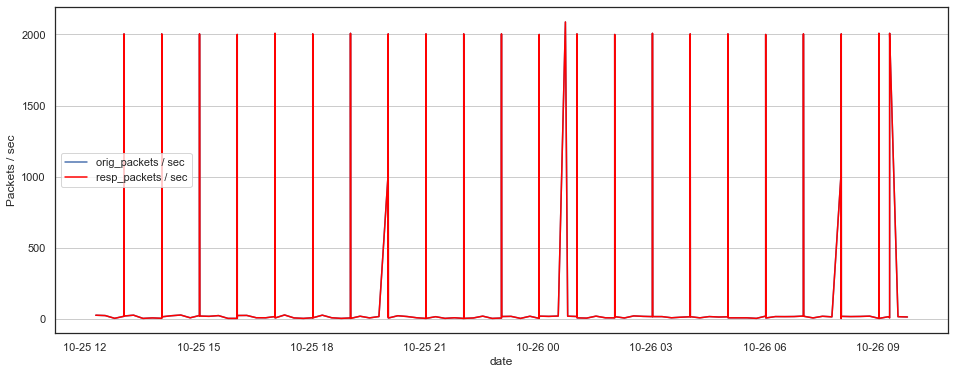

In [60]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue_conn, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue_conn, label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### Without outliers

Text(0, 0.5, 'Packets / sec')

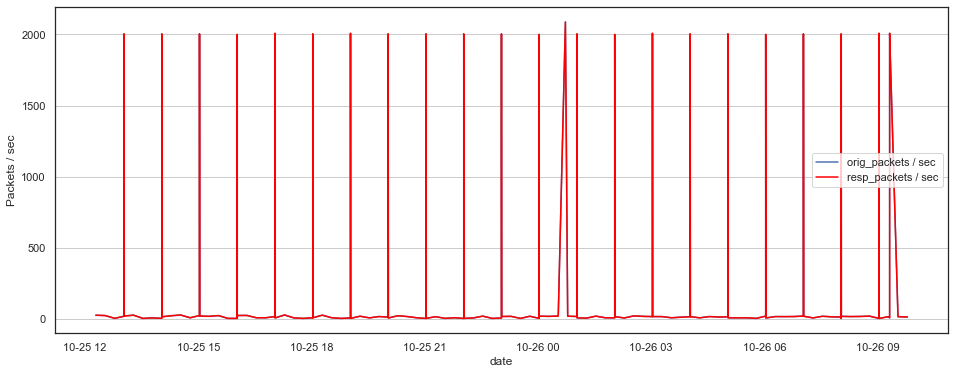

In [61]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=phillips_hue_conn_wo_outliers, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=phillips_hue_conn_wo_outliers, label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Packets / sec")

### Packets difference against time

Text(0, 0.5, "Difference between originator's and responder's packets")

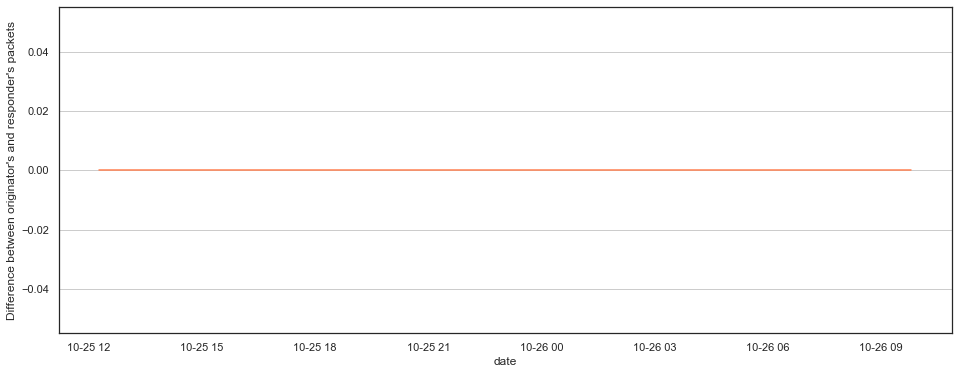

In [62]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's packets")

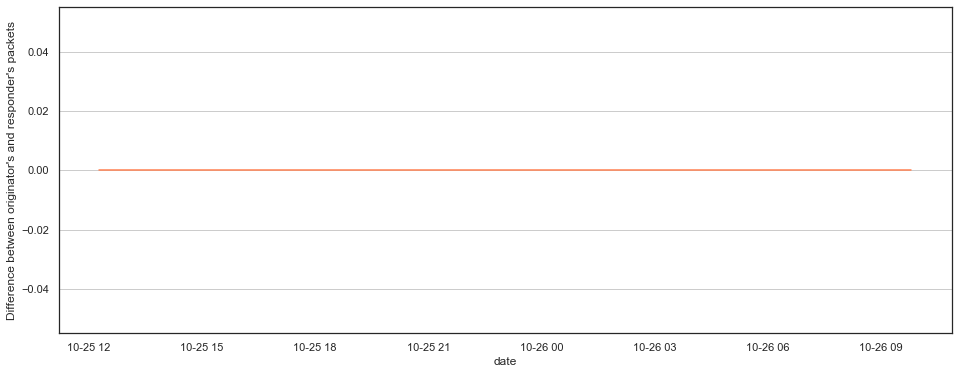

In [63]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=phillips_hue_conn_wo_outliers, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Bytes difference against time

Text(0, 0.5, "Difference between originator's and responder's bytes")

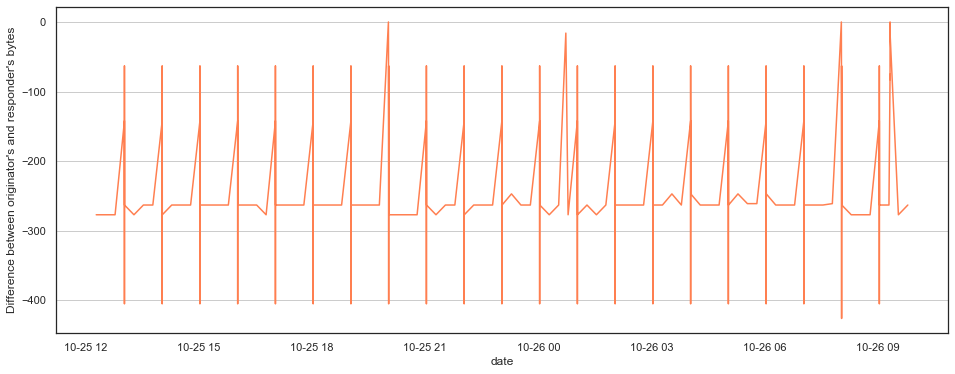

In [64]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's bytes")

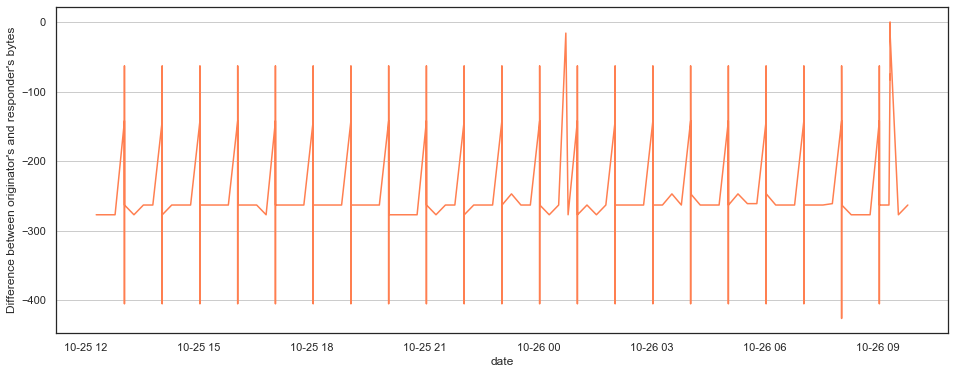

In [65]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=phillips_hue_conn_wo_outliers, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference in packet rates against time

Text(0, 0.5, "Difference between originator's and responder's packets/sec")

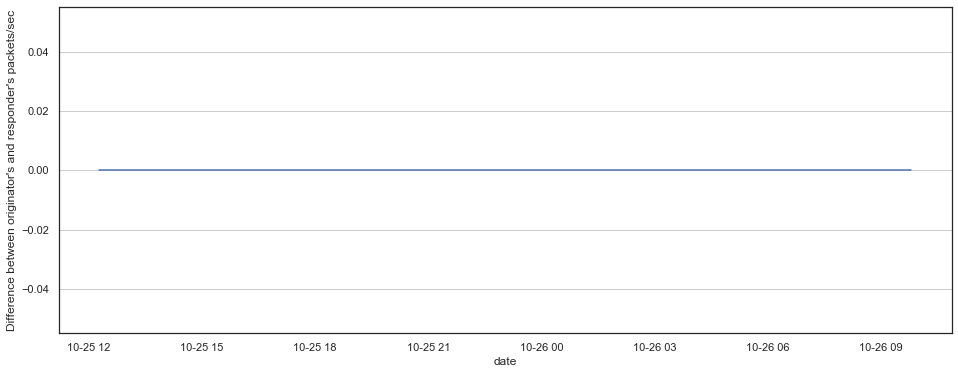

In [66]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=phillips_hue_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/sec")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's packets/sec")

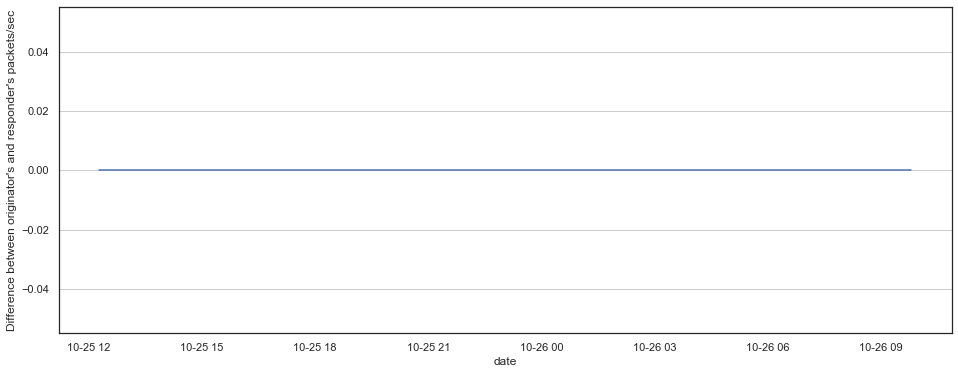

In [67]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=phillips_hue_conn_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/sec")

### Difference in byte rates against time

Text(0, 0.5, "Difference between originator's and responder's bytes/sec")

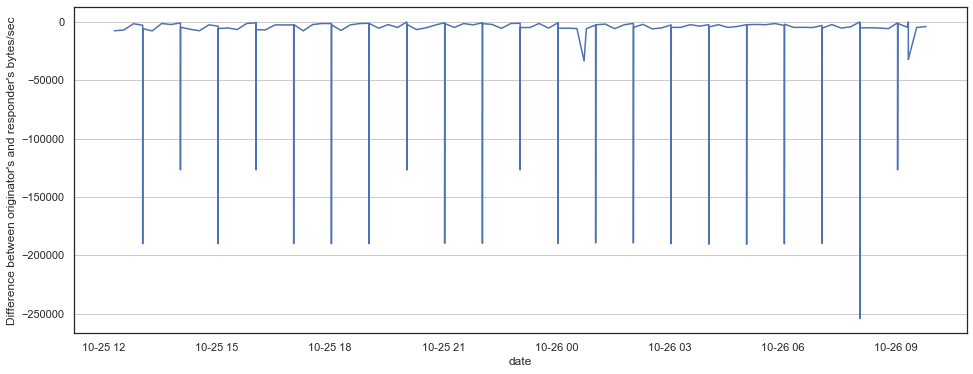

In [68]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/sec")

#### Without outliers

Text(0, 0.5, "Difference between originator's and responder's bytes/sec")

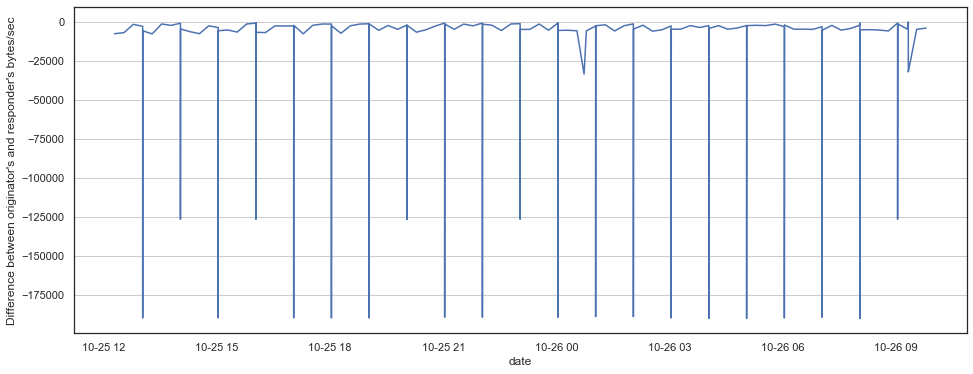

In [69]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=phillips_hue_conn_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/sec")

### Protocol type statistics

In [70]:
# since there is only one protocol in this dataset there is no point of further visualization
phillips_hue_conn['protocol'].nunique()

1